In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv("/content/Dataset.csv")

In [ ]:
df.head(1)

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,Residential,Central AC,28,380


In [ ]:

unique_values = df['Building Type'].unique()
unique_sysy = df['HVAC System'].unique()


print(unique_values)
print(unique_sysy)


[' Residential' ' Commercial']
[' Central AC' ' Split AC' ' Window AC']


In [ ]:
df.columns

Index(['Room Area (sq. ft.)', 'Number of Appliances',
       'Outside Temperature (C)', 'Insulation Thickness (inches)',
       'Building Type', 'HVAC System',
       'Average Temperature in last 24 hours (C)', 'Energy Consumption (kWh)'],
      dtype='object')

<ipython-input-45-6d580c2fa330>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


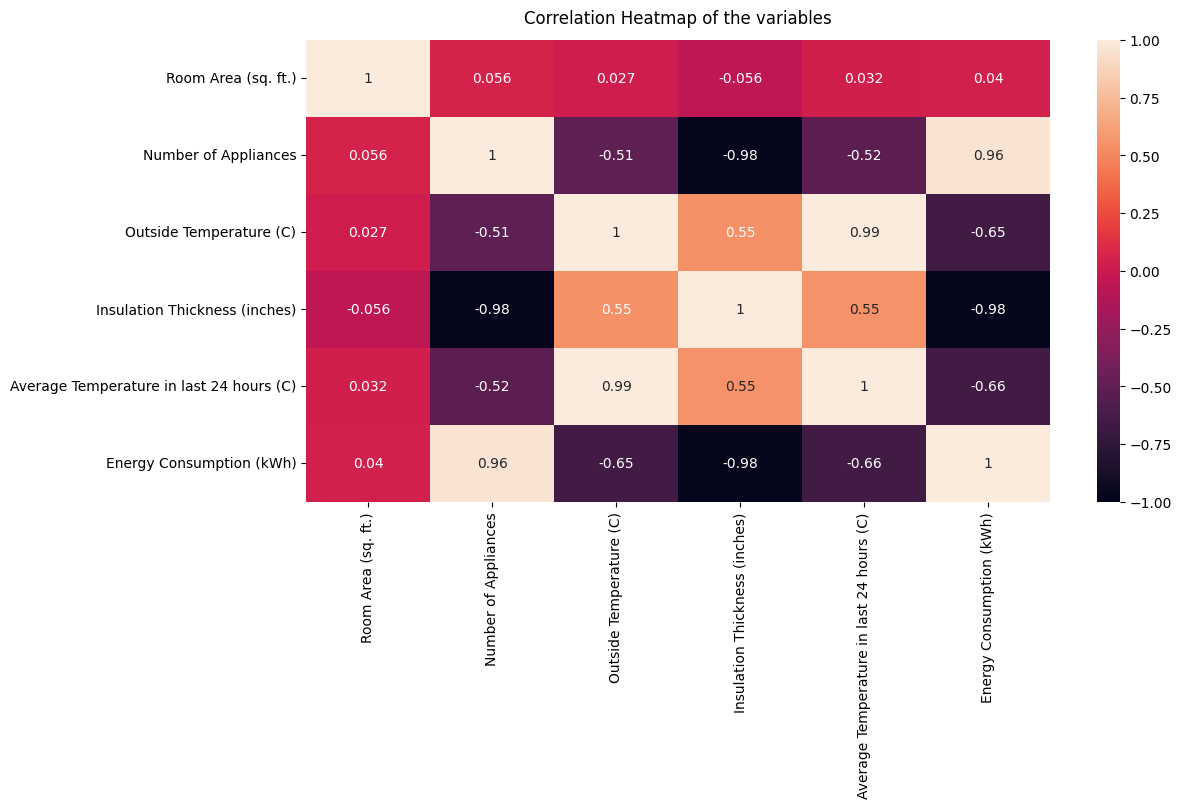

In [ ]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the variables', fontdict={'fontsize':12}, pad=12);

In [ ]:
df.isnull().sum()

Room Area (sq. ft.)                         0
Number of Appliances                        0
Outside Temperature (C)                     0
Insulation Thickness (inches)               0
Building Type                               0
HVAC System                                 0
Average Temperature in last 24 hours (C)    0
Energy Consumption (kWh)                    0
dtype: int64

In [ ]:
df.columns

Index(['Room Area (sq. ft.)', 'Number of Appliances',
       'Outside Temperature (C)', 'Insulation Thickness (inches)',
       'Building Type', 'HVAC System',
       'Average Temperature in last 24 hours (C)', 'Energy Consumption (kWh)'],
      dtype='object')

In [ ]:
#One Hot Encoding
# Variables to apply one hot encoding
list = [ 'Building Type', 'HVAC System']
#df_clean = pd.get_dummies(df, columns =list, drop_first = True)
df_clean = pd.get_dummies(df, columns =list, drop_first =  False)


In [ ]:
df_clean.head(1)

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Energy Consumption (kWh),Building Type_ Commercial,Building Type_ Residential,HVAC System_ Central AC,HVAC System_ Split AC,HVAC System_ Window AC
0,270,15,30,2.0,28,380,0,1,1,0,0


# multiple linear regresiion


In [ ]:
df_clean.shape

(45, 11)

In [ ]:
x_ = df_clean.drop('Energy Consumption (kWh)', axis=1)
y_ = df_clean['Energy Consumption (kWh)']

In [ ]:
df_clean.columns

Index(['Room Area (sq. ft.)', 'Number of Appliances',
       'Outside Temperature (C)', 'Insulation Thickness (inches)',
       'Average Temperature in last 24 hours (C)', 'Energy Consumption (kWh)',
       'Building Type_ Commercial', 'Building Type_ Residential',
       'HVAC System_ Central AC', 'HVAC System_ Split AC',
       'HVAC System_ Window AC'],
      dtype='object')

In [ ]:
x_.columns

Index(['Room Area (sq. ft.)', 'Number of Appliances',
       'Outside Temperature (C)', 'Insulation Thickness (inches)',
       'Average Temperature in last 24 hours (C)', 'Building Type_ Commercial',
       'Building Type_ Residential', 'HVAC System_ Central AC',
       'HVAC System_ Split AC', 'HVAC System_ Window AC'],
      dtype='object')

In [ ]:

from sklearn.linear_model import LinearRegression

# Train the multiple linear regression model
model = LinearRegression()
model.fit(x_, y_)

LinearRegression()

## point one

In [ ]:
## point 1: Room Area (sq. ft.): 279, Number of Appliances: 16, Outside Temperature (°C): 20,
##Insulation Thickness (inches): 1.7, Building Type: Residential, HVAC System: Central AC,
##Average Temperature in last 24 hours (°C): 19, Energy Consumption (kWh):


In [ ]:
 point1 = [279, 16, 20, 1.7, 19, 0,  1, 1, 0, 0, ]
 pred_point1 = model.predict([point1])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 print('Predicted Energy Consumption (point1):', pred_point1)

Predicted Energy Consumption (point1): [423.63209416]


## point two

In [ ]:
#point 2: Room Area (sq. ft.): 277, Number of Appliances: 22, Outside Temperature (°C): 15,
#Insulation Thickness (inches): 1.5, Building Type: Commercial, HVAC System: Split AC,
#Average Temperature in last 24 hours (°C): 14, Energy Consumption (kWh): 425


In [ ]:
point2 = [277, 22, 15, 1.5, 14, 1, 0, 0, 1,  0]
pred_point2 = model.predict([point2])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 print('Predicted Energy Consumption (point2):', pred_point2)

Predicted Energy Consumption (point2): [440.24067264]


## point 3

In [ ]:
#point 3: Room Area (sq. ft.): 276, Number of Appliances: 14, Outside Temperature (°C): 25,
#Insulation Thickness (inches): 2.2, Building Type: Residential, HVAC System: Window AC,
#Average Temperature in last 24 hours (°C): 26, Energy Consumption (kWh): 350

In [ ]:
point3 = [276, 14, 25, 2.2, 26, 0, 1, 0, 0, 1]
pred_point3 = model.predict([point3])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 print('Predicted Energy Consumption (point2):', pred_point3)

Predicted Energy Consumption (point2): [362.01955645]


## MSE

In [ ]:
ytrue = [385, 425, 350]
ypred = [423.63209416, 440.24067264, 362.01955645]

df = pd.DataFrame({'ytrue': ytrue, 'ypred': ypred})
print(df)


   ytrue       ypred
0    385  423.632094
1    425  440.240673
2    350  362.019556


In [ ]:
from sklearn.metrics import mean_squared_error
ytrue = [385, 425, 350]
ypred = [423.63209416, 440.24067264, 362.01955645]
mse = mean_squared_error(ytrue, ypred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 623.0621796538293


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Index': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'X1': [8.27, 1.58, 5.92, 9.44, 2.11, 4.71, 3.82, 6.98, 3.15, 8.9, 7.65, 9.83, 1.94, 7.13, 5.77, 4.36, 5.09, 3.42, 2.76, 9.6],
    'X2': [5.59, 5.87, 5.87, 5.83, 5.57, 5.94, 5.84, 5.91, 5.42, 5.94, 5.77, 5.29, 5.36, 5.28, 5.47, 5.31, 5.65, 5.24, 5.71, 5.52],
    'Y': ['+', '-', '-', '+', '-', '+', '+', '-', '-','-', '+', '-', '+', '-', '-', '+', '-', '+', '+', '-']
}
df = pd.DataFrame(data)

# Split the data into X (features) and y (labels)
X = df[['X1', 'X2']]
y = df['Y']

# Train the KNN classifier with K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)

# Train the KNN classifier with K=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)

# Predict the labels for the given points
point1 = [[7.81, 5.33]]
point2 = [[9.43, 5.29]]

label1_k1 = knn1.predict(point1)
label1_k3 = knn3.predict(point1)

label2_k1 = knn1.predict(point2)
label2_k3 = knn3.predict(point2)

# Find the indices of the closest neighbors
distances, indices = knn1.kneighbors(point1)
index1_k1 = indices[0][0]

distances, indices = knn3.kneighbors(point1)
index1_k3 = indices[0][-1]

distances, indices = knn1.kneighbors(point2)
index2_k1 = indices[0][0]

distances, indices = knn3.kneighbors(point2)
index2_k3 = indices[0][-1]




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

In [ ]:
# Print the results
print(f'Predicted labels for point 1 (K=1): {label1_k1}')
print(f'Predicted labels for point 1 (K=3): {label1_k3}')
print(f'Predicted labels for point 2 (K=1): {label2_k1}')
print(f'Predicted labels for point 2 (K=3): {label2_k3}')



Predicted labels for point 1 (K=1): ['+']
Predicted labels for point 1 (K=3): ['+']
Predicted labels for point 2 (K=1): ['-']
Predicted labels for point 2 (K=3): ['-']


In [ ]:
print(f'Index of the closest neighbors for point 1 (K=1): {index1_k1}')
print(f'Index of the closest neighbors for point 1 (K=3): {index1_k3}')
print(f'Index of the closest neighbors for point 2 (K=1): {index2_k1}')
print(f'Index of the closest neighbors for point 2 (K=3): {index2_k3}')

Index of the closest neighbors for point 1 (K=1): 10
Index of the closest neighbors for point 1 (K=3): 13
Index of the closest neighbors for point 2 (K=1): 19
Index of the closest neighbors for point 2 (K=3): 3
